<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(0__4)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0-4'

In [4]:
os.listdir(base_path)

['data_multi_delta_0_n20-4.csv',
 'data_multi_delta_0_n30-4.csv',
 'data_multi_delta_0_n60-4.csv',
 'data_multi_delta_0_n120-4.csv',
 'data_multi_delta_0_n250-4.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n20-4.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,79.965965,75.260433,40.182287,-2.951341,202.457344,204.953493,-2.496149
1,0.0,1.0,72.467779,25.509381,57.503722,0.216462,165.697344,165.027548,0.669796
2,0.0,2.0,21.530958,20.864849,66.873311,1.236202,120.505320,119.924058,0.581262
3,0.0,3.0,94.824112,44.805622,29.188290,-1.317959,177.500066,177.795301,-0.295234
4,0.0,4.0,41.674271,30.636070,99.633769,1.710706,183.654816,182.480151,1.174665
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,77.775881,35.055271,48.254710,-1.232744,169.853118,170.490135,-0.637017
19996,999.0,16.0,23.558197,58.670559,68.954248,0.783207,161.966211,161.795436,0.170775
19997,999.0,17.0,95.981646,42.724976,38.559715,0.126169,187.392507,186.463985,0.928522
19998,999.0,18.0,43.239114,55.963329,77.591579,1.471083,188.265106,187.018157,1.246949


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,79.965965,75.260433,40.182287,-2.951341,202.457344,204.953493,-2.496149
1,0.0,1.0,72.467779,25.509381,57.503722,0.216462,165.697344,165.027548,0.669796
2,0.0,2.0,21.530958,20.864849,66.873311,1.236202,120.505320,119.924058,0.581262
3,0.0,3.0,94.824112,44.805622,29.188290,-1.317959,177.500066,177.795301,-0.295234
4,0.0,4.0,41.674271,30.636070,99.633769,1.710706,183.654816,182.480151,1.174665
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,77.775881,35.055271,48.254710,-1.232744,169.853118,170.490135,-0.637017
19996,999.0,16.0,23.558197,58.670559,68.954248,0.783207,161.966211,161.795436,0.170775
19997,999.0,17.0,95.981646,42.724976,38.559715,0.126169,187.392507,186.463985,0.928522
19998,999.0,18.0,43.239114,55.963329,77.591579,1.471083,188.265106,187.018157,1.246949


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    79.965965  75.260433  40.182287  ...  202.457344  204.953493 -2.496149
      1.0    72.467779  25.509381  57.503722  ...  165.697344  165.027548  0.669796
      2.0    21.530958  20.864849  66.873311  ...  120.505320  119.924058  0.581262
      3.0    94.824112  44.805622  29.188290  ...  177.500066  177.795301 -0.295234
      4.0    41.674271  30.636070  99.633769  ...  183.654816  182.480151  1.174665
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   77.775881  35.055271  48.254710  ...  169.853118  170.490135 -0.637017
      16.0   23.558197  58.670559  68.954248  ...  161.966211  161.795436  0.170775
      17.0   95.981646  42.724976  38.559715  ...  187.392507  186.463985  0.928522
      18.0   43.239114  55.963329  77.591579  ...  188.265106  187.018157  1.246949
      19.0   33.247682  35.218570  87.893829  ...  166.969235  166.483641  0.485595

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    79.965965  75.260433  40.182287  ...  202.457344  204.953493 -2.496149
      1.0    72.467779  25.509381  57.503722  ...  165.697344  165.027548  0.669796
      2.0    21.530958  20.864849  66.873311  ...  120.505320  119.924058  0.581262
      3.0    94.824112  44.805622  29.188290  ...  177.500066  177.795301 -0.295234
      4.0    41.674271  30.636070  99.633769  ...  183.654816  182.480151  1.174665
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   77.775881  35.055271  48.254710  ...  169.853118  170.490135 -0.637017
      16.0   23.558197  58.670559  68.954248  ...  161.966211  161.795436  0.170775
      17.0   95.981646  42.724976  38.559715  ...  187.392507  186.463985  0.928522
      18.0   43.239114  55.963329  77.591579  ...  188.265106  187.018157  1.246949
      19.0   33.247682  35.218570  87.893829  ...  166.969235  166.483641  0.485595

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,79.965965,75.260433,40.182287,-2.951341,202.457344,204.953493,-2.496149
1,0.0,1.0,72.467779,25.509381,57.503722,0.216462,165.697344,165.027548,0.669796
2,0.0,2.0,21.530958,20.864849,66.873311,1.236202,120.505320,119.924058,0.581262
3,0.0,3.0,94.824112,44.805622,29.188290,-1.317959,177.500066,177.795301,-0.295234
4,0.0,4.0,41.674271,30.636070,99.633769,1.710706,183.654816,182.480151,1.174665
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,77.775881,35.055271,48.254710,-1.232744,169.853118,170.490135,-0.637017
19996,999.0,16.0,23.558197,58.670559,68.954248,0.783207,161.966211,161.795436,0.170775
19997,999.0,17.0,95.981646,42.724976,38.559715,0.126169,187.392507,186.463985,0.928522
19998,999.0,18.0,43.239114,55.963329,77.591579,1.471083,188.265106,187.018157,1.246949


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    79.965965  75.260433  40.182287  ...  202.457344  204.953493 -2.496149
      1.0    72.467779  25.509381  57.503722  ...  165.697344  165.027548  0.669796
      2.0    21.530958  20.864849  66.873311  ...  120.505320  119.924058  0.581262
      3.0    94.824112  44.805622  29.188290  ...  177.500066  177.795301 -0.295234
      4.0    41.674271  30.636070  99.633769  ...  183.654816  182.480151  1.174665
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   77.775881  35.055271  48.254710  ...  169.853118  170.490135 -0.637017
      16.0   23.558197  58.670559  68.954248  ...  161.966211  161.795436  0.170775
      17.0   95.981646  42.724976  38.559715  ...  187.392507  186.463985  0.928522
      18.0   43.239114  55.963329  77.591579  ...  188.265106  187.018157  1.246949
      19.0   33.247682  35.218570  87.893829  ...  166.969235  166.483641  0.485595

[20000 rows x 7 columns]

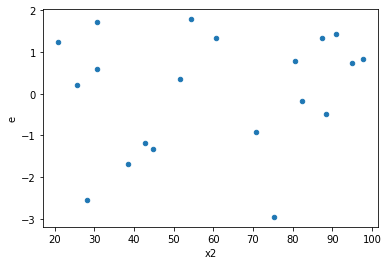

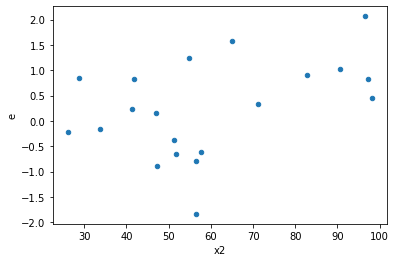

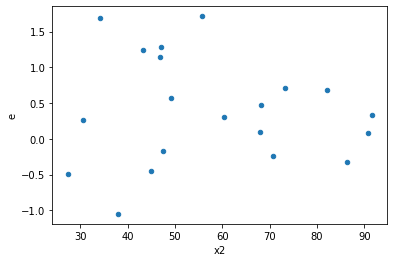

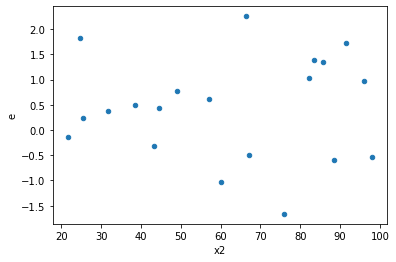

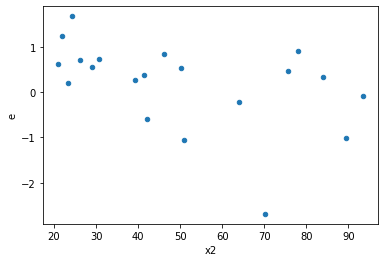

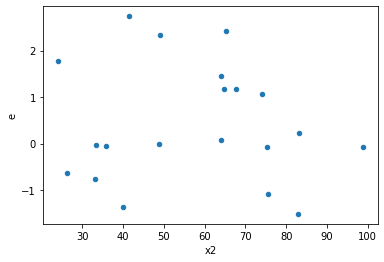

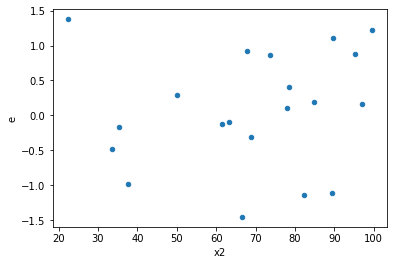

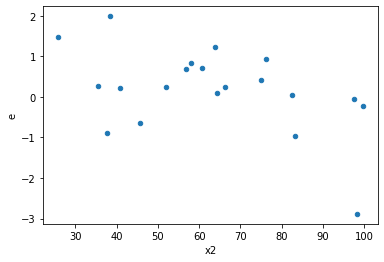

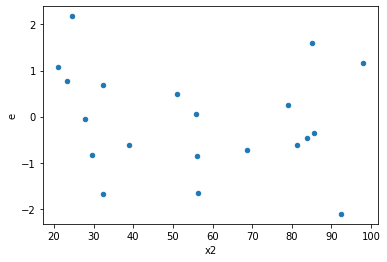

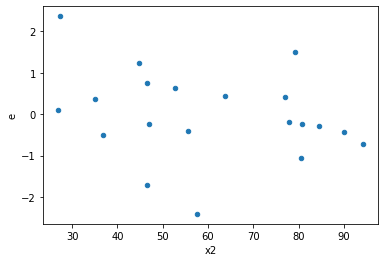

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,5.0,5.0,1.408352966413235,3.0458712953439875,0.281670593282647,0.6091742590687975,2.16271869906388,0.4171936331046746,0.7914031834476627,0.2085968165523373,Reject001=1 : Homoscedasticity
2.0,5.0,5.0,0.6371225416042665,1.0196945506336663,0.1274245083208533,0.20393891012673326,1.6004684876885509,0.6183650487856327,0.6908174756071837,0.30918252439281635,Reject001=1 : Homoscedasticity
3.0,5.0,5.0,2.937133550067214,8.791219616485494,0.5874267100134428,1.7582439232970988,2.9931290037132676,0.2541194852648758,0.8729402573675621,0.1270597426324379,Reject001=1 : Homoscedasticity
4.0,5.0,5.0,1.052907907927827,5.539307937063757,0.2105815815855654,1.1078615874127515,5.260961471896797,0.09241720157133404,0.953791399214333,0.04620860078566702,Reject001=1 : Homoscedasticity
8.0,5.0,5.0,3.6098511347416613,8.866873251231178,0.7219702269483322,1.7733746502462355,2.456298866702639,0.34646621549181966,0.8267668922540902,0.17323310774590983,Reject001=1 : Homoscedasticity
12.0,5.0,5.0,1.8481819663099583,3.857769504137389,0.36963639326199166,0.7715539008274778,2.0873320779337172,0.43848199562206314,0.7807590021889684,0.21924099781103157,Reject001=1 : Homoscedasticity
15.0,5.0,5.0,3.682558297578494,6.235828987574617,0.7365116595156989,1.2471657975149235,1.6933415532552611,0.5773121280756848,0.7113439359621576,0.2886560640378424,Reject001=1 : Homoscedasticity
16.0,5.0,5.0,3.40509391304216,7.493955199257752,0.681018782608432,1.4987910398515505,2.200807199635368,0.4069687074020243,0.7965156462989879,0.20348435370101214,Reject001=1 : Homoscedasticity
17.0,5.0,5.0,0.6245540642743344,2.8319925389236964,0.12491081285486687,0.5663985077847393,4.534423360472679,0.12264353270178852,0.9386782336491057,0.06132176635089426,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,11.566184708720362,5.025808896102374,2.3132369417440724,1.0051617792204748,0.43452607948696764,0.3815606055999221,Reject001=1 : Homoscedasticity
1.0,5.0,5.0,1.408352966413235,3.0458712953439875,0.281670593282647,0.6091742590687975,2.16271869906388,0.4171936331046746,Reject001=1 : Homoscedasticity
2.0,5.0,5.0,0.6371225416042665,1.0196945506336663,0.1274245083208533,0.20393891012673326,1.6004684876885509,0.6183650487856327,Reject001=1 : Homoscedasticity
3.0,5.0,5.0,2.937133550067214,8.791219616485494,0.5874267100134428,1.7582439232970988,2.9931290037132676,0.2541194852648758,Reject001=1 : Homoscedasticity
4.0,5.0,5.0,1.052907907927827,5.539307937063757,0.2105815815855654,1.1078615874127515,5.260961471896797,0.09241720157133404,Reject001=1 : Homoscedasticity
5.0,5.0,5.0,11.216755053881,4.251497892935005,2.2433510107762,0.8502995785870009,0.37903100072279683,0.31064076306309574,Reject001=1 : Homoscedasticity
6.0,5.0,5.0,3.144326708975963,2.124506399156863,0.6288653417951926,0.4249012798313726,0.6756633759119667,0.6775276949468815,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,5.206630559482627,3.2184738394231367,1.0413261118965254,0.6436947678846273,0.6181490702391894,0.6104483562573877,Reject001=1 : Homoscedasticity
8.0,5.0,5.0,3.6098511347416613,8.866873251231178,0.7219702269483322,1.7733746502462355,2.456298866702639,0.34646621549181966,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      969
Reject001=0 : Heteroscedasticity     31
Name: Result_test, dtype: int64